## 本算法欲使用最简单的卷积神经网络算法进行训练，完成早期版本

In [59]:
import matplotlib.pyplot as plt
from process_data import *
from keras import *
from keras.layers.convolutional import *
from keras.layers.pooling import *
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.optimizers import SGD

## 读取数据集

In [60]:
X,Y=get_data()

In [61]:
print(X.shape)
print(Y.shape)

(560, 28, 64, 3)
(560,)


## 将每一个图片分成4个目标框，逐个进行学习

In [62]:
x_set=[]
y_set=[]
for x in X:
    x_set.append(x[:,2:18,:]) 
    x_set.append(x[:,17:33,:]) 
    x_set.append(x[:,31:47,:]) 
    x_set.append(x[:,40:56,:])
for y in Y:
    for i in range(4):
        y_set.append(y[i].upper())
     

In [63]:
# 将 y_set 转化为int型标签
a=[ord(i)-ord('0') for i in y_set]
iny_set=[i-7 if i>10 else i for i in a]

In [64]:
iny_set[1491]=7

In [90]:
one_hot_labels[y_set.index('X')]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0.], dtype=float32)

In [65]:
one_hot_labels =utils.to_categorical(iny_set, num_classes=36)

## 整理数据集，按照7:3的比例划分训练集和测试集

In [66]:
X_train=np.asarray(x_set[0:int(0.7*len(x_set))])/255
Y_train=np.asarray(one_hot_labels[0:len(X_train)])
X_test=np.asarray(x_set[len(X_train):])/255
Y_test=np.asarray(one_hot_labels[len(X_train):])


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1568, 28, 16, 3)
(1568, 36)
(672, 28, 16, 3)
(672, 36)


### 例子

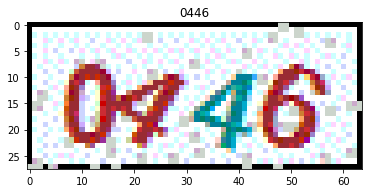

In [67]:
plt.title(Y[13])
plt.imshow(X[13])

In [27]:
y_set.index('A')

139

In [30]:
print(Y_train[139])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


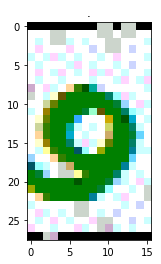

In [58]:
plt.title(y_set[1491])
plt.imshow(X_train[1488])

## 建立model

In [32]:
input_shape=(28,16,3)
data_input=Input(input_shape)

In [33]:
model=Sequential()
model.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=input_shape))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(12,(5,5),padding='same',activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(36))
model.add(Activation("softmax"))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 16, 6)         456       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 16, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 8, 6)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 8, 12)         1812      
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 8, 12)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 336)               0         
__________

In [91]:
model.compile(optimizer=SGD(lr=0.001, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy',
       metrics=['accuracy'])

In [96]:
model.fit(X_train, Y_train, epochs=100, batch_size=128)

Epoch 1/100
1568/1568 [==============================] - 0s 43us/step - loss: 0.2739 - acc: 0.9114
Epoch 2/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2505 - acc: 0.9145
Epoch 3/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2884 - acc: 0.9037
Epoch 4/100
1568/1568 [==============================] - 0s 41us/step - loss: 0.2580 - acc: 0.9126
Epoch 5/100
1568/1568 [==============================] - 0s 40us/step - loss: 0.2894 - acc: 0.9069
Epoch 6/100
1568/1568 [==============================] - 0s 32us/step - loss: 0.2757 - acc: 0.9075
Epoch 7/100
1568/1568 [==============================] - 0s 46us/step - loss: 0.2371 - acc: 0.9171
Epoch 8/100
1568/1568 [==============================] - 0s 37us/step - loss: 0.2590 - acc: 0.9247
Epoch 9/100
1568/1568 [==============================] - 0s 42us/step - loss: 0.2646 - acc: 0.9114
Epoch 10/100
1568/1568 [==============================] - 0s 34us/step - loss: 0.2733 - acc: 0.9152
Epoch 11/

1568/1568 [==============================] - 0s 40us/step - loss: 0.2919 - acc: 0.9011
Epoch 84/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2797 - acc: 0.9114
Epoch 85/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2544 - acc: 0.9145
Epoch 86/100
1568/1568 [==============================] - 0s 42us/step - loss: 0.3135 - acc: 0.9024
Epoch 87/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2872 - acc: 0.9031
Epoch 88/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2882 - acc: 0.9031
Epoch 89/100
1568/1568 [==============================] - 0s 38us/step - loss: 0.2697 - acc: 0.9062
Epoch 90/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2747 - acc: 0.9069
Epoch 91/100
1568/1568 [==============================] - 0s 40us/step - loss: 0.2847 - acc: 0.9107
Epoch 92/100
1568/1568 [==============================] - 0s 39us/step - loss: 0.2825 - acc: 0.9082
Epoch 93/100


In [97]:
Y_t=model.predict_classes(X_train)
Y_tb=iny_set[:1568]
bias=np.sum([Y_t[i]==Y_tb[i] for i in range(1568)])/1568
Y_pre=model.predict_classes(X_test)
Y_biao=iny_set[1568:]
var=np.sum([Y_pre[i]==Y_biao[i] for i in range(672)])/692
print(bias)
print(var)

0.9929846938775511
0.7890173410404624


In [291]:
model.save("My_paras.h5")

## 最终正确率在40%